In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np


In [87]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [88]:
len(x_train)

60000

In [89]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten =  x_test.reshape(len(x_test),28*28)
x_train_flatten.shape

(60000, 784)

In [90]:
x_train_flatten2 = x_train.flatten()
x_train_flatten2.shape

(47040000,)

In [91]:
model = keras.Sequential([
    Dense(1024,input_shape=(784,),activation="sigmoid"),
    Dropout(0.1),
    Dense(256,activation='tanh'),
    Dropout(0.1),
    Dense(10,activation="softmax")
    
])
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.00005),loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7351 - loss: 0.8699
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9256 - loss: 0.2551
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9429 - loss: 0.1951
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9548 - loss: 0.1535
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9603 - loss: 0.1341
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9660 - loss: 0.1145
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9714 - loss: 0.0958
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9736 - loss: 0.0850
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9777 - loss: 0.0749
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9808 - loss: 0.0654
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9830 - loss: 0.0594
Epoch 12/20
1875/18

In [92]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.1029


[0.0867612212896347, 0.9753999710083008]

In [93]:
model.save("MODEL_MNIST.keras")

In [96]:
y_pred = model.predict(x_test_flatten)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


1

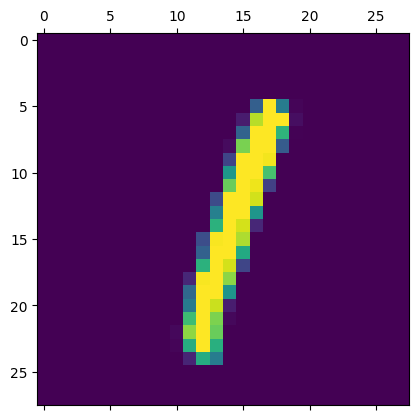

In [109]:
i = 5
plt.matshow(x_test[i])
y_pred_number = [np.argmax(i) for i in y_pred]
y_pred_number[i]

In [111]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_number)

Text(95.72222222222221, 0.5, 'Truth')

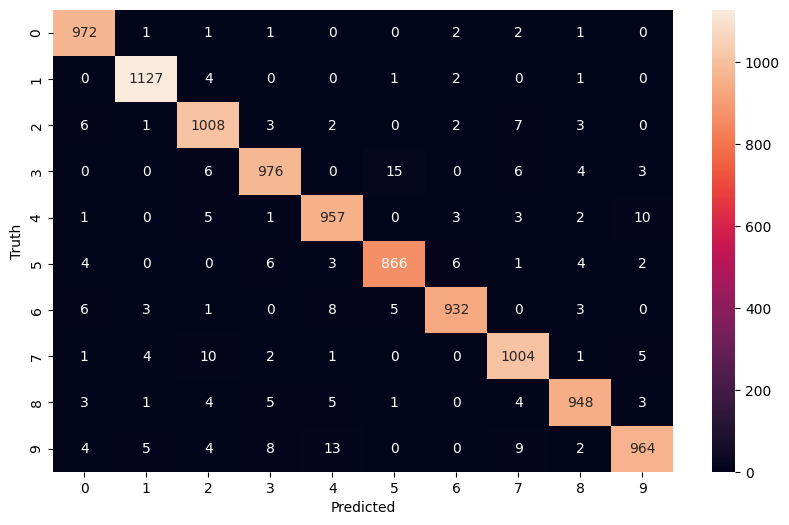

In [114]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')